In [2]:
from obspy.core import Stream, read
import numpy as np
from pytensor.compile.ops import as_op
import pytensor
import pytensor.tensor as pt
import matplotlib.pyplot as plt
import pandas as pd
import os 
import os.path
import pymc as pm
import arviz as az

In [3]:
# What exactly are the colunns here? Amplitude of waves at a specific time?
# My equivalent = peak strain at a specific time

# Build the target function, misfit to this is what is being minimized
@as_op(itypes=[pt.dvector,pt.dscalar,pt.dscalar,pt.dscalar,pt.dscalar,pt.dscalar], otypes=[pt.dvector])
def two_straight_lines(x,m1,m2,xinter,x0,y0):
    '''
    input x coordiantes are in x
    slopes are m1 and m2
    intercept of left hand line is b1 
    intersection of two lines is at xinter
    
    Note that y intercept of second straight line is dependent on b1 and xinter
      and defined entirely by them (so that the lines touch).
    '''
    
    # Output vector
    y_out = np.ones(len(x))
    
    # Before building the first straight line, calculate the intercept
    b1 = y0 - m1*x0
    
    # Build first straight line segment
    y_out = m1*x + b1
    
    # Find points that are after the intersection and make the second segment
    i = np.where(x>xinter)[0]
    
    # Define second y intercept
    b2 = m1*xinter + b1 - m2*xinter
    
    # Make second straight line
    y_out[i] = m2*x[i] + b2

    return y_out

# Build the target function, misfit to this is what is being minimized
def non_pytensor_two_straight_lines(x,m1,m2,xinter,x0,y0):
    '''
    input x coordiantes are in x
    slopes are m1 and m2
    intercept of left hand line is b1 
    intersection of two lines is at xinter
    
    Note that y intercept of second straight line is dependent on b1 and xinter
      and defined entirely by them (so that the lines touch).
    '''
    
    # Output vector
    yout = np.ones(len(x))
    
    # Before building the first straight line, calculate the intercept
    b1 = y0 - m1*x0
    
    # Build first straight line segment
    yout = m1*x + b1
    
    # Find points that are after the intersection and make the second segment
    i = np.where(x>xinter)[0]
    
    # Define second y intercept
    b2 = m1*xinter + b1 - m2*xinter
    
    # Make second straight line
    yout[i] = m2*x[i] + b2

    return yout

In [4]:
path = '/Users/sydneydybing/StrainProject/2024/tohoku_strain_data/'
snr_array = pd.read_csv(path + 'stations_hypdists_snrs.list')
snr_array

,Station_name,latitude,longitude,azimuth(S1),azimuth(S2),azimuth(S3),azimuth(S4),hyp_dist_km,rms_snr
0,KST1,33.5201,135.8363,310,40,85,175,792.746765,1.273396
1,HGM1,33.8675,135.7318,337,67,112,202,773.809644,1.139778
2,ICU1,33.9001,136.1379,141,231,276,6,743.491829,1.203692
3,ANO1,34.7870,136.4019,38,128,173,263,661.251185,1.113420
4,SSK1,33.3896,133.3229,355,85,130,220,981.546244,1.285971
5,UWA1,33.3859,132.4823,222,312,357,87,1045.683453,1.282839
6,MUR1,33.2856,134.1563,147,237,282,12,927.200827,1.258307
7,MYM1,34.1123,136.1815,237,327,12,102,724.694237,1.134499


Processing KST1
20.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 5_000 tune and 15_000 draw iterations (20_000 + 60_000 draws total) took 107 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       0.019  0.000   0.018    0.019      0.000    0.000      23.0   
m2       0.000  0.000  -0.001    0.001      0.000    0.000      77.0   
xinter  20.899  0.164  20.593   21.188      0.021    0.015      64.0   
sigma    0.016  0.001   0.015    0.017      0.000    0.000   12957.0   

        ess_tail  r_hat  
m1          43.0   1.15  
m2          78.0   1.08  
xinter      83.0   1.05  
sigma    14744.0   1.00  


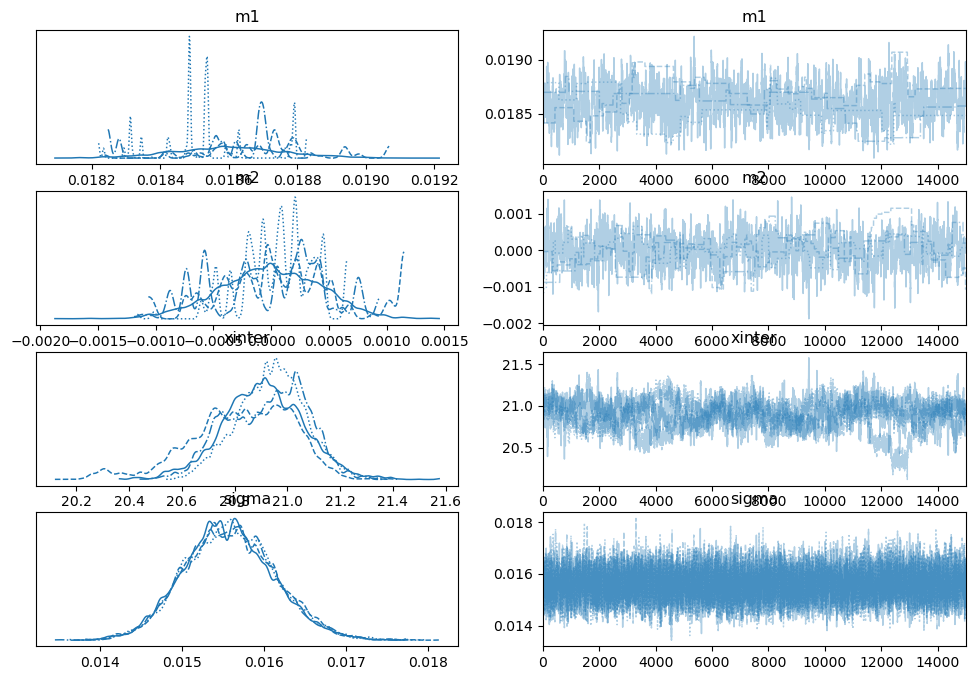

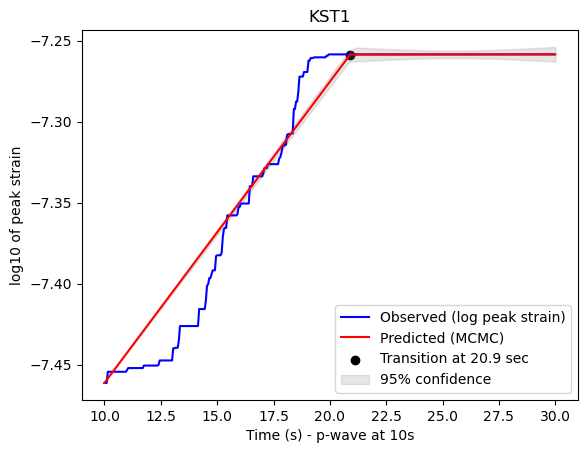

Processing HGM1
20.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 5_000 tune and 15_000 draw iterations (20_000 + 60_000 draws total) took 129 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       0.012  0.000   0.011    0.012      0.000    0.000      35.0   
m2      -0.000  0.001  -0.001    0.001      0.000    0.000      67.0   
xinter  23.391  0.211  23.032   23.792      0.029    0.021      56.0   
sigma    0.012  0.000   0.011    0.012      0.000    0.000   12701.0   

        ess_tail  r_hat  
m1          23.0   1.10  
m2         136.0   1.06  
xinter     107.0   1.08  
sigma    14150.0   1.00  


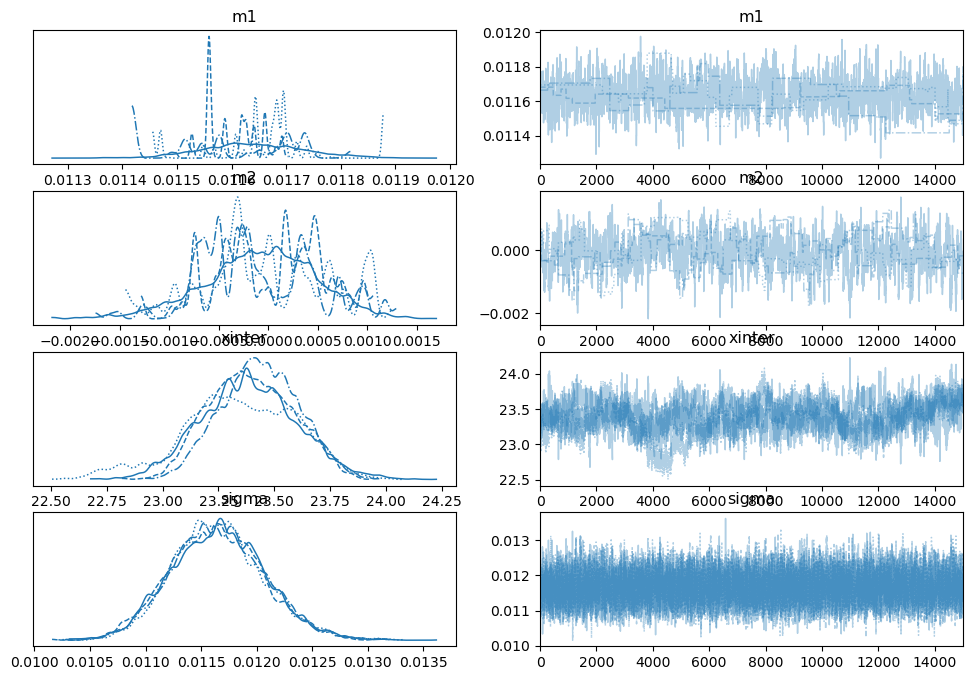

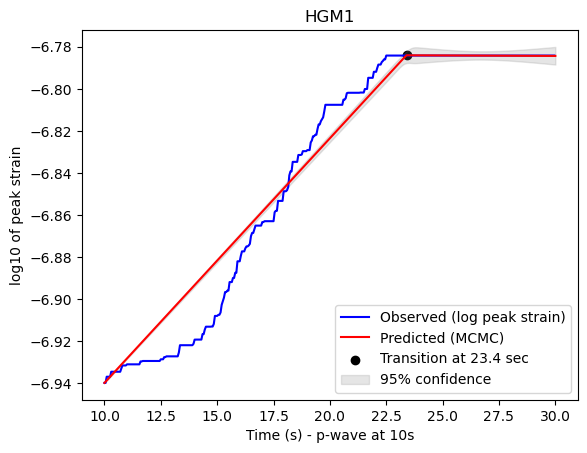

Processing ICU1
20.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 5_000 tune and 15_000 draw iterations (20_000 + 60_000 draws total) took 116 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       0.015  0.000   0.014    0.015      0.000    0.000       6.0   
m2       0.000  0.000  -0.000    0.000      0.000    0.000       7.0   
xinter  19.317  0.095  19.139   19.476      0.041    0.031       6.0   
sigma    0.004  0.000   0.003    0.004      0.000    0.000    1403.0   

        ess_tail  r_hat  
m1          19.0   1.87  
m2          41.0   1.59  
xinter      31.0   1.87  
sigma    13221.0   1.01  


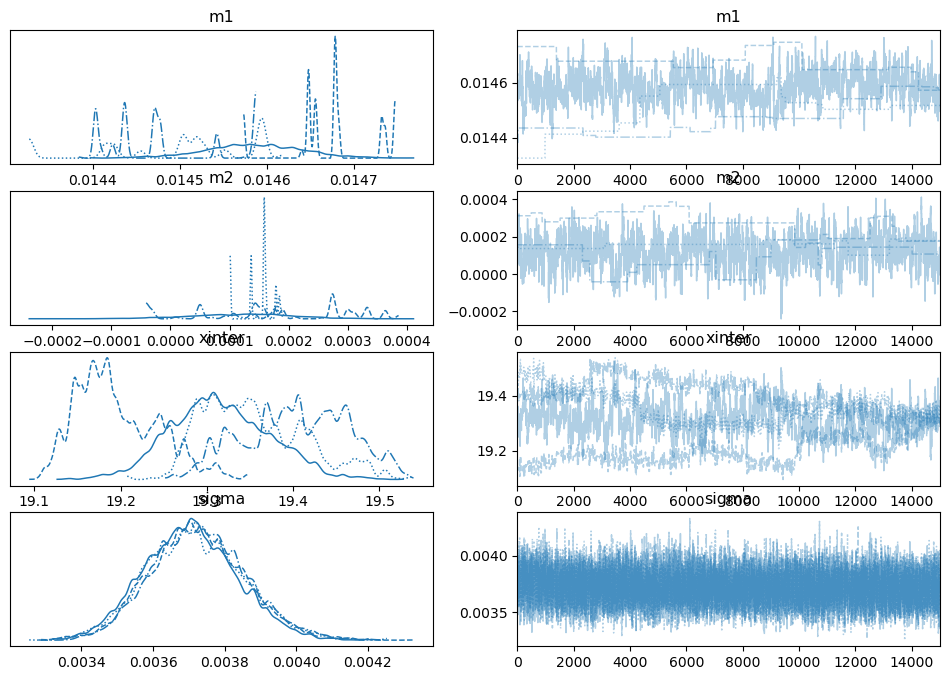

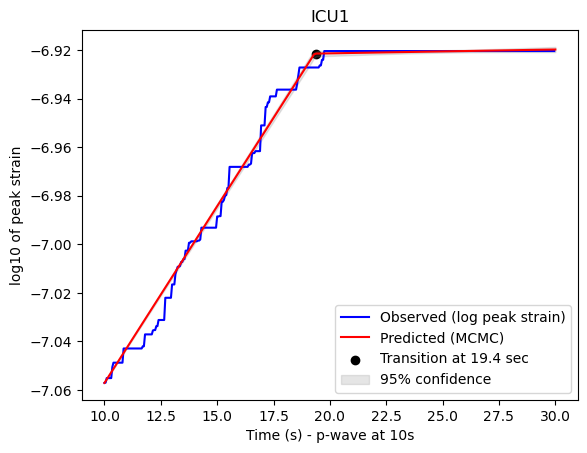

Processing ANO1
20.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]



KeyboardInterrupt



In [9]:
events_list = []
mags_list = []
stas_list = []
hypdist_list = []
xhighs_list = []
m1s_list = []
m2s_list = []
xinters_list = []
sigmas_list = []
trans_time_list = []

for idx in range(len(snr_array)):

    sta = snr_array['Station_name'][idx]

    # Figure out the bounds for the MCMC based on the event and hypocentral distance (rainbow plots)
    xlow = 10
    xhigh = 30
    evt_id = 'tohoku'
    mag = '9.1'
    hypdist = snr_array['hyp_dist_km'][idx]
    int_hypdist = int(hypdist)

    try:
        pst = read(path + 'filtered_peak_post_p/' + sta + '.mseed')
    except:
        print('Skipping ' + sta + ', no data')
        continue

    print('Processing ' + str(sta))

    times = pst[0].times()
    data = pst[0].data
    log10_data = np.log10(data)
    samp_rate = pst[0].stats.sampling_rate
    print(samp_rate)

    vec_start = int(xlow*samp_rate)
    vec_end = int(xhigh*samp_rate)

    # Split into x and y vectors
    xobserved = times[vec_start:vec_end]
    yobserved = log10_data[vec_start:vec_end]
    x0 = xobserved[0]
    y0 = yobserved[0]

    # in order to pass the x variable into the target function it needs to be 
    # converted to a Theano "shared" variable
    pt_xobserved = pytensor.shared(xobserved)
    pt_x0 = pytensor.shared(x0)
    pt_y0 = pytensor.shared(y0)

    # MCMC run parameters, these are good numbers for a "production" run. If you are
    # fooling arund these can be lower to iterate faster
    Nburn = 5000 # burn in samples that get discarded
    Nmcmc = 15000 # bump to at least 5-10k
    Nchains = 4
    Ncores = 1

    # Bounds for the prior distributions
    m1_low = -1; m1_high = 1
    m2_low = -1; m2_high = 1
    xinter_low = 10 ; xinter_high = 25 # location of the line slope change

    # Define the Bayesian model
    with pm.Model()as model:

        # Use normal distributions as priors
        m1 = pm.Uniform('m1', lower = m1_low, upper = m1_high)
        m2 = pm.Uniform('m2', lower = m2_low, upper = m2_high)
        xinter = pm.Uniform('xinter', lower = xinter_low, upper = xinter_high)
        sigma = pm.HalfCauchy('sigma', beta = 10, initval = 1)

        # This is the model
        likelihood = pm.Normal('y', mu = two_straight_lines(pt_xobserved,m1,m2,xinter,pt_x0,pt_y0),
                                observed = yobserved, sigma = sigma)

        # NUTS sampler (default) is gradient based and won't work, use metropolis
        step = pm.Metropolis(scaling = 0.1)

        # This runs the mcmc sampler
        mcmc = pm.sample(Nmcmc, tune = Nburn, chains = Nchains, cores = Ncores, step = step)

    # Done, now is post-processing to get the data out of the sampler

    posterior = az.extract(mcmc)

    # Unwrap coeficients - WRITE LINES TO SAVE THE ARRAYS!!!
    m1_array = posterior.m1.values
    m1 = np.mean(m1_array)
    # print('m1 mean: ' + str(round(m1,2)))

    m2_array = posterior.m2.values
    m2 = np.mean(m2_array)
    # print('m2 mean: ' + str(round(m2,2)))

    xinter_array = posterior.xinter.values
    xinter = np.mean(xinter_array)
    # print('xinter Mean: ' + str(round(xinter,2)))

    sigma_array = posterior.sigma.values
    sigma = np.mean(sigma_array)

    # Lines!
    b1 = y0 - m1*x0
    b2 = m1*xinter + b1 - m2*xinter

    # Make plot to check stuff
    xpredicted = np.arange(xobserved.min(), xobserved.max()+0.1, 0.1)
    ypredicted = m1*xpredicted + b1
    i = np.where(xpredicted > xinter)[0]
    ypredicted[i] = m2*xpredicted[i] + b2

    # Get one-sigma region (need to obtain a ton of forward models and get stats)
    N = len(posterior.m1.values)

    yfit = np.zeros((len(xpredicted), N))
    for k in range(N):
        yfit[:,k] = non_pytensor_two_straight_lines(xpredicted,m1_array[k],m2_array[k],xinter_array[k],x0,y0)
    mu = yfit.mean(1)
    sig = yfit.std(1) * 1.95 #for 95% confidence
    mu_plus = mu + sig
    mu_minus = mu - sig

    # Least squares
    mls, bls = np.polyfit(xobserved, yobserved, 1)

    # Find the transition point in ypredicted
    diff = np.round(np.diff(ypredicted), decimals = 5)
    # print(diff)
    first_slope = diff[0]
    second_slope = diff[-1]
    trans_idx = np.where((diff != first_slope) & (diff != second_slope))[0][0] + 1

    # Get the transition point
    mcmc_trans_x = xpredicted[trans_idx] # Number
    mcmc_trans_y = ypredicted[trans_idx]

    # Append things
    events_list.append(evt_id)
    mags_list.append(mag)
    stas_list.append(sta)
    hypdist_list.append(int_hypdist)
    xhighs_list.append(xhigh)
    m1s_list.append(m1)
    m2s_list.append(m2)
    xinters_list.append(xinter)
    sigmas_list.append(sigma)
    trans_time_list.append(mcmc_trans_x)

    # Create folder for the event
    array_save_dir = path + 'mcmc_arrays/' + sta + '/'
    if os.path.isdir(array_save_dir):
        pass
    else:
        os.makedirs(array_save_dir)

    # np.save(array_save_dir + 'xobserved.npy', xobserved)
    # np.save(array_save_dir + 'yobserved.npy', yobserved)
    # np.save(array_save_dir + 'xpredicted.npy', xpredicted)
    # np.save(array_save_dir + 'ypredicted.npy', ypredicted)
    # np.save(array_save_dir + 'forward_mus.npy', mu)
    # np.save(array_save_dir + 'foward_sigs.npy', sig)

    summary = az.summary(mcmc, fmt = 'wide')
    print(summary)
    # summary.to_csv(array_save_dir + 'mcmc_summary.csv', index = False)

    # Folder for figures
    fig_save_dir = path + 'mcmc_plots/'
    if os.path.isdir(fig_save_dir):
        pass
    else:
        os.makedirs(fig_save_dir)

    az.plot_trace(mcmc)
    plt.show()
    # plt.savefig(fig_save_dir + sta + '_stats_plots.png', format = 'PNG')
    # plt.close()

    # Plot all solutions
    fig = plt.figure(dpi = 100)
    ax = fig.add_subplot(111)
    ax.set_title(str(sta))

    ax.plot(xobserved, yobserved, color = 'blue', label = 'Observed (log peak strain)')
    ax.plot(xpredicted, ypredicted, color = 'red', label = 'Predicted (MCMC)')
    # ax.plot(xpredicted, mu, color = 'green', linestyle = '--', label = 'yfit')
    # ax.plot(xpredicted, xpredicted * mls + bls, color = 'orange', label = 'np.polyfit least squares')
    ax.scatter(xpredicted[trans_idx], ypredicted[trans_idx], marker = 'o', color = 'black', label = 'Transition at ' + str(round(xpredicted[trans_idx],2)) + ' sec')
    # ax.scatter(closest_trans_x, closest_trans_y, marker = 'o', color = 'green', label = 'Adjusted transition at ' + str(round(closest_trans_x,2)) + ' sec')
    # ax2 = ax.twinx()
    # ax2.plot(xobserved, pythags_arr, color = 'violet')
    # ax2.axhline(closest_trans_x, color = 'violet', linestyle = '--')
    ax.fill_between(xpredicted, mu_plus, mu_minus, color = 'gray', alpha = 0.2, label = '95% confidence') # 95% confidence interval
    ax.set_xlabel('Time (s) - p-wave at 10s')
    ax.set_ylabel('log10 of peak strain')
    # ax.set_xlim(10,13)
    ax.legend()

    plt.show()

    # plt.savefig(fig_save_dir + sta + '.png', format = 'PNG')
    # plt.close()

In [21]:
mcmc_array = np.column_stack((np.array(events_list), np.array(mags_list), np.array(stas_list), np.array(hypdist_list),
                             np.array(xhighs_list), np.array(m1s_list), np.array(m2s_list), np.array(xinters_list),
                             np.array(sigmas_list), np.round(np.array(trans_time_list),2)))

np.save(path + 'mcmc_arrays/mcmc_colstack_array.npy', mcmc_array)

In [22]:
mcmc_array.shape

(8, 10)

In [23]:
# mcmc_array = np.column_stack((np.array(events_list), np.array(mags_list), np.array(stas_list), np.array(hypdist_list),
#                              np.array(xhighs_list), np.array(m1s_list), np.array(m2s_list), np.array(xinters_list),
#                              np.array(sigmas_list), np.array(trans_time_list)))

pd_mcmc = pd.DataFrame(mcmc_array, columns = ['eq_id', 'mag', 'sta', 'hypdist', 'xhigh', 'm1', 'm2', 'xinter', 'sigma', 'trans_time'])
pd_mcmc.to_csv(path + 'mcmc_arrays/mcmc_results_summary.csv', index = False)

In [5]:
# Figure out the "good" and "bad" performing waveforms using an L2 norm

mcmc_results = pd.read_csv(path + 'mcmc_arrays/mcmc_results_summary.csv')
mcmc_results

,eq_id,mag,sta,hypdist,xhigh,m1,m2,xinter,sigma,trans_time
0,tohoku,9.1,KST1,792,30,0.018600,0.000080,20.889108,0.015569,20.9
1,tohoku,9.1,HGM1,773,30,0.011659,-0.000007,23.343609,0.011667,23.4
2,tohoku,9.1,ICU1,743,30,0.014857,0.000364,19.044328,0.003993,19.1
3,tohoku,9.1,ANO1,661,30,0.008045,-0.000026,22.688112,0.006779,22.7
4,tohoku,9.1,SSK1,981,30,0.019607,0.000212,20.665775,0.012695,20.7
5,tohoku,9.1,UWA1,1045,30,0.018982,0.000662,19.519484,0.006913,19.6
6,tohoku,9.1,MUR1,927,30,0.019188,0.000421,17.805309,0.004535,17.9
7,tohoku,9.1,MYM1,724,30,0.008035,0.000121,20.671915,0.004024,20.7


In [7]:
print(np.mean(mcmc_results['m1'].values))
print(np.mean(mcmc_results['m2'].values))
print(np.mean(mcmc_results['xinter'].values))

print(np.median(mcmc_results['m1'].values))
print(np.median(mcmc_results['m2'].values))
print(np.median(mcmc_results['xinter'].values))

0.014871350005825288
0.00022832002697642897
20.578455051172632
0.01672819422259945
0.00016655422617455
20.668845337347474
